In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
df = pd.read_csv(url, low_memory=False)

In [13]:
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [17]:
school_name = "ABRAHAM LINCOLN HS"
print(school_name)

ABRAHAM LINCOLN HS


In [28]:
school_row = df[df["School Name"] == school_name]
print(school_row.head())

Empty DataFrame
Columns: [School DBN, School Name, School Level, Regents Exam, Year, Total Tested, Mean Score, Number Scoring Below 65, Percent Scoring Below 65, Number Scoring 65 or Above, Percent Scoring 65 or Above, Number Scoring 80 or Above, Percent Scoring 80 or Above, Number Scoring CR, Percent Scoring CR]
Index: []


In [29]:
feature = "Mean Score"
print("Selected feature:", feature)

df[feature].head(10)

Selected feature: Mean Score


,Mean Score
0,s
1,77.9
2,74
3,s
4,s
5,67.4
6,72.6
7,64.4
8,78.4
9,79


In [33]:
print("All schools summary:")
print(df[feature].describe())

All schools summary:
count     212331
unique       748
top            s
freq       75222
Name: Mean Score, dtype: object


In [35]:
df["Mean Score"] = pd.to_numeric(df["Mean Score"], errors="coerce")
df = df.dropna(subset=["Mean Score"])
print("Cleaning complete.")

Cleaning complete.


In [36]:
print(df["Mean Score"].head(10))

1     77.9
2     74.0
5     67.4
6     72.6
7     64.4
8     78.4
9     79.0
10    84.8
11    83.9
12    62.9
Name: Mean Score, dtype: float64


In [39]:
overall_mean = df["Mean Score"].mean()
school_score = df[df["School Name"] == "ABRAHAM LINCOLN HS"]["Mean Score"].mean()

print("School score:", school_score)
print("Overall mean score:", overall_mean)

School score: nan
Overall mean score: 65.99896651569189


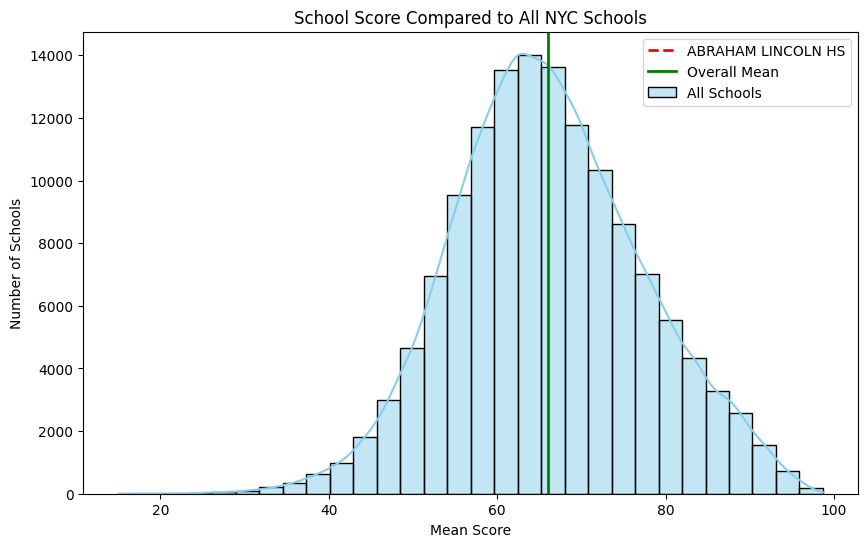

In [40]:
school_score = df[df["School Name"] == school_name][feature].mean()
overall_mean = df[feature].mean()

plt.figure(figsize=(10,6))
sns.histplot(df[feature], bins=30, kde=True, color='skyblue', label="All Schools")
plt.axvline(school_score, color='red', linestyle='--', linewidth=2, label=f"{school_name}")
plt.axvline(overall_mean, color='green', linestyle='-', linewidth=2, label="Overall Mean")
plt.xlabel("Mean Score")
plt.ylabel("Number of Schools")
plt.title("School Score Compared to All NYC Schools")
plt.legend()
plt.show()

Conclusion: ABRAHAM LINCOLN HS has a mean score close to the average of all schools. Its performance falls within the typical range, as shown in the histogram. Overall, the school’s scores are consistent with the general trend across NYC schools.